## Spaceship Titanic Prediction Model

## Importing of libraries and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-dark')

In [2]:
data=pd.read_csv(r"C:\Users\Rano's PC\Machine\github_repo_cloned\SpaceShip-Titanic\train.csv")

In [3]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## Basic Information about data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [11]:
print('Total duplicate values are:')
print("-"*20)
print(data.duplicated().sum())

Total duplicate values are:
--------------------
0


In [10]:
print('Percentage of null values are: ')
print("-"*20)
print(round((data.isnull().sum()/len(data))*100,2))

Percentage of null values are: 
--------------------
PassengerId     0.00
HomePlanet      2.31
CryoSleep       2.50
Cabin           2.29
Destination     2.09
Age             2.06
VIP             2.34
RoomService     2.08
FoodCourt       2.11
ShoppingMall    2.39
Spa             2.11
VRDeck          2.16
Name            2.30
Transported     0.00
dtype: float64


In [22]:
data.describe(include=['object'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,9280_02,Earth,False,G/734/S,TRAPPIST-1e,False,Anton Woody
freq,1,4602,5439,8,5915,8291,2


In [24]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [25]:
data.describe(include='boolean')

,Transported
count,8693
unique,2
top,True
freq,4378


## Univariate analysis and basic cleaning if needed

In [27]:
data.columns=data.columns.str.lower()

In [32]:
data[data.isnull().any(axis=1)].sample(15)

,passengerid,homeplanet,cryosleep,cabin,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,name,transported
1718,1829_01,Europa,False,D/56/P,55 Cancri e,48.0,False,0.0,3578.0,80.0,123.0,NaN,NaN,True
6498,6858_04,Europa,False,B/229/P,NaN,8.0,False,0.0,0.0,0.0,0.0,0.0,Taura Spandisket,True
7816,8342_01,Europa,False,E/548/S,TRAPPIST-1e,48.0,False,0.0,NaN,0.0,408.0,293.0,Tach Sprender,True
220,0234_01,Earth,False,F/50/P,TRAPPIST-1e,43.0,False,NaN,888.0,0.0,0.0,0.0,Keitha Josey,False
3856,4131_01,Europa,True,C/147/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,NaN,0.0,Achium Pokematic,True
8009,8573_01,Earth,False,F/1652/S,TRAPPIST-1e,34.0,NaN,10.0,4.0,1.0,0.0,791.0,Marine Harry,True
2668,2859_01,Europa,True,C/98/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Navior Excialing,True
962,1024_03,NaN,False,G/152/P,55 Cancri e,54.0,False,0.0,5.0,0.0,594.0,209.0,Bellee Chavezalez,False
1540,1632_01,Europa,True,C/62/S,TRAPPIST-1e,32.0,False,0.0,NaN,0.0,0.0,0.0,Cella Fatted,True
3756,4017_01,Mars,False,E/269/S,TRAPPIST-1e,21.0,NaN,0.0,0.0,0.0,0.0,0.0,Frouse Mele,False


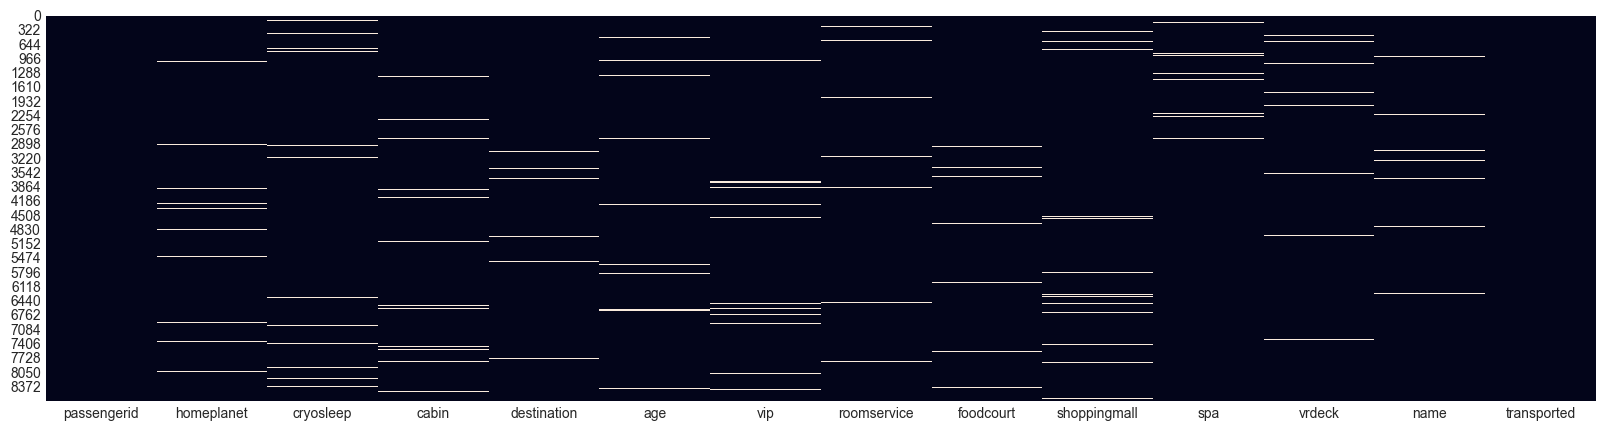

In [37]:
plt.figure(figsize=(20,5))
sns.heatmap(data.isnull(),cbar=False)
plt.show()

### Passenger ID

Skipping this as it is not helpful, but might need later so keeping this as of now

### Home Planet

In [ ]:
data['homeplanet'].value_counts(normalize=True)*100

homeplanet
Earth     54.192181
Europa    25.094206
Mars      20.713613
Name: proportion, dtype: float64

In [44]:
most_occured_homeplanet=data['homeplanet'].mode()[0]
(data['homeplanet'].fillna(most_occured_homeplanet).value_counts(normalize=True))*100

homeplanet
Earth     55.251352
Europa    24.513977
Mars      20.234672
Name: proportion, dtype: float64

In [46]:
print('Change in value is :')
print((data['homeplanet'].fillna(most_occured_homeplanet).value_counts(normalize=True))*100-data['homeplanet'].value_counts(normalize=True)*100)

Change in value is :
homeplanet
Earth     1.059171
Europa   -0.580230
Mars     -0.478941
Name: proportion, dtype: float64


In [58]:
data['homeplanet'].fillna(most_occured_homeplanet,inplace=True)

### Cryosleep

In [55]:
data['cryosleep'].value_counts(1)*100

cryosleep
False    64.16942
True     35.83058
Name: proportion, dtype: float64

In [56]:
most_occured_cryosleep=data['cryosleep'].mode()[0]
data['cryosleep'].fillna(most_occured_cryosleep).value_counts(1)*100

cryosleep
False    65.063844
True     34.936156
Name: proportion, dtype: float64

In [57]:
print("change in values: ")
print(data['cryosleep'].fillna(most_occured_cryosleep).value_counts(1)*100-data['cryosleep'].value_counts(1)*100)

change in values: 
cryosleep
False    0.894425
True    -0.894425
Name: proportion, dtype: float64


In [60]:
data['cryosleep'].fillna(most_occured_cryosleep,inplace=True)

### Cabin

In [61]:
data['cabin'].nunique()

6560

In [62]:
data['cabin'].describe()

count        8494
unique       6560
top       G/734/S
freq            8
Name: cabin, dtype: object

### Destination

In [65]:
data['destination'].value_counts(1)*100

destination
TRAPPIST-1e      69.498296
55 Cancri e      21.149101
PSO J318.5-22     9.352603
Name: proportion, dtype: float64

In [66]:
most_occured_destination=data['destination'].mode()[0]
data['destination'].fillna(most_occured_destination).value_counts(1)*100

destination
TRAPPIST-1e      70.136892
55 Cancri e      20.706315
PSO J318.5-22     9.156793
Name: proportion, dtype: float64

In [67]:
print('Difference is: ')
print(data['destination'].fillna(most_occured_destination).value_counts(1)*100-data['destination'].value_counts(1)*100)

Difference is: 
destination
TRAPPIST-1e      0.638595
55 Cancri e     -0.442786
PSO J318.5-22   -0.195810
Name: proportion, dtype: float64


In [68]:
data['destination'].fillna(most_occured_destination,inplace=True)

### Age

In [71]:
mean_age=data['age'].mean()
median_age=data['age'].median()

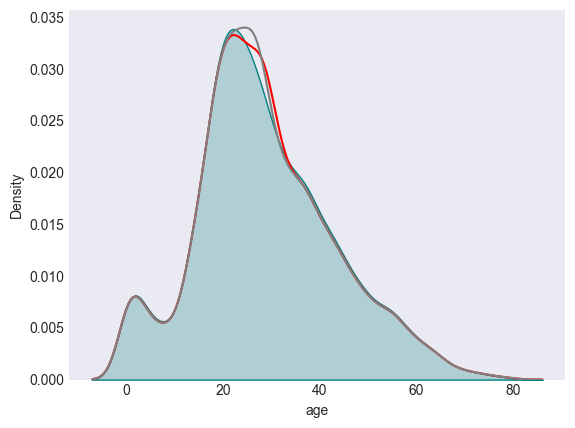

In [79]:
sns.kdeplot(data['age'],color='teal',fill=True)
sns.kdeplot(data['age'].fillna(mean_age),color='red')
sns.kdeplot(data['age'].fillna(median_age),color='grey')
plt.show()

In [80]:
data['age'].fillna(median_age,inplace=True)

### VIP

In [84]:
data['vip'].value_counts(1)*100

vip
False    97.656066
True      2.343934
Name: proportion, dtype: float64

In [85]:
most_occured_vip=data['vip'].mode()[0]
data['vip'].fillna(most_occured_vip).value_counts(1)*100

vip
False    97.710802
True      2.289198
Name: proportion, dtype: float64

In [86]:
print('Difference is: ')
print(data['vip'].fillna(most_occured_vip).value_counts(1)*100-data['vip'].value_counts(1)*100)

Difference is: 
vip
False    0.054736
True    -0.054736
Name: proportion, dtype: float64


In [87]:
data['vip'].fillna(most_occured_vip,inplace=True)

### Roomservice

<Axes: xlabel='roomservice', ylabel='Count'>

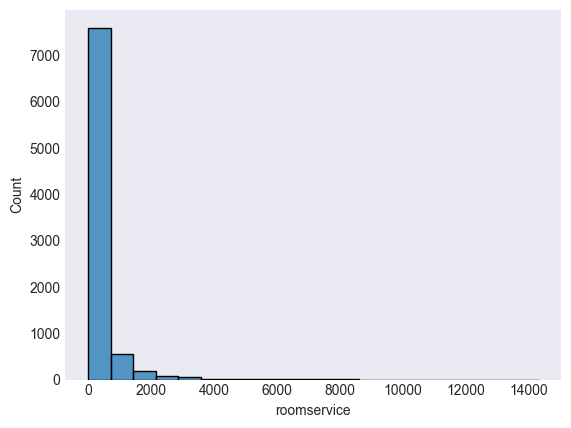

In [91]:
sns.histplot(data['roomservice'],bins=20)

In [92]:
data['roomservice'].mode()

0    0.0
Name: roomservice, dtype: float64

In [93]:
data['roomservice'].fillna(0,inplace=True)

### Food Court

<Axes: xlabel='foodcourt', ylabel='Count'>

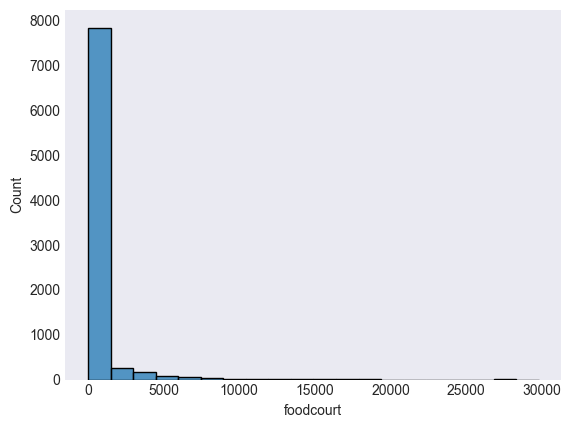

In [94]:
sns.histplot(data['foodcourt'],bins=20)

In [95]:
data['foodcourt'].fillna(0,inplace=True)

### Shopping mall

<Axes: xlabel='shoppingmall', ylabel='Count'>

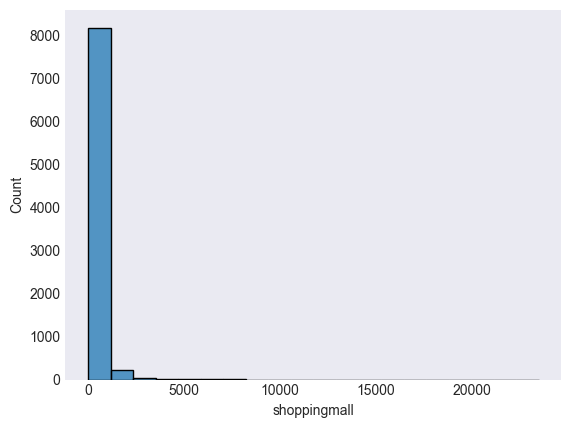

In [96]:
sns.histplot(data['shoppingmall'],bins=20)

In [97]:
data['shoppingmall'].mode()

0    0.0
Name: shoppingmall, dtype: float64

In [98]:
data['shoppingmall'].fillna(0,inplace=True)

### Spa

<Axes: xlabel='spa', ylabel='Count'>

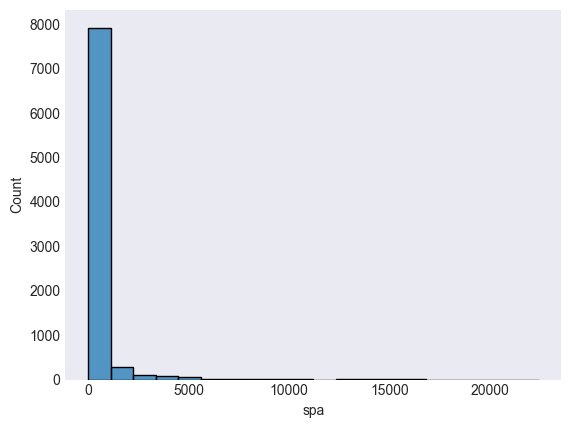

In [99]:
sns.histplot(data['spa'],bins=20)

In [100]:
data['spa'].fillna(0,inplace=True)

### VR Deck

<Axes: xlabel='vrdeck', ylabel='Count'>

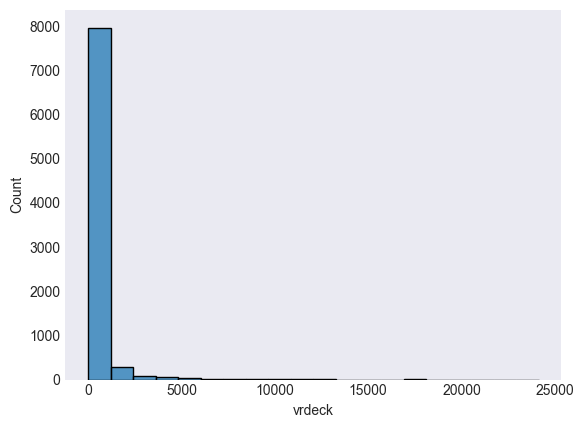

In [101]:
sns.histplot(data['vrdeck'],bins=20)

In [102]:
data['vrdeck'].fillna(0,inplace=True)

### Name

In [103]:
data['name'].nunique()

8473

### Transported

In [104]:
data['transported'].value_counts()

transported
True     4378
False    4315
Name: count, dtype: int64

## Feature engineering if possible and further data preparations

In [124]:
data.head()

,passengerid,homeplanet,cryosleep,cabin,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,name,transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


<Axes: >

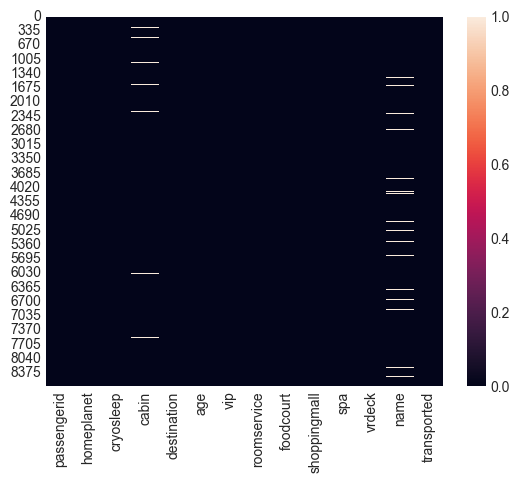

In [125]:
sns.heatmap(data.isnull())

In [139]:
data['cabin'].str.split("/",expand=True)[0]

0       B
1       F
2       A
3       A
4       F
       ..
8688    A
8689    G
8690    G
8691    E
8692    E
Name: 0, Length: 8693, dtype: object

In [147]:
def get_cabin_group(cabin,data):
    cabingroup=data[cabin].str.split("/",expand=True)[0]
    return pd.DataFrame(cabingroup)

In [148]:
get_cabin_group('cabin',data)

,0
0,B
1,F
2,A
3,A
4,F
...,...
8688,A
8689,G
8690,G
8691,E
